# Mini Project 2 Part 2

## Text Classification

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [27]:
fake_news_training = pd.read_csv('../data/fake_news/fake_news_train.csv')
fake_news_validation = pd.read_csv('../data/fake_news/fake_news_val.csv')
fake_news_test = pd.read_csv('../data/fake_news/fake_news_test.csv')


### Base case

In [ ]:
vectorizer = CountVectorizer()

vectorizer.fit(fake_news_training['text'])
training_features = vectorizer.transform(fake_news_training['text'])
validation_features = vectorizer.transform(fake_news_validation['text'])

# Model Training
clf = LogisticRegression(max_iter=1000, C=4.25e-02)
clf.fit(training_features, fake_news_training['label'])

# Model Prediction
y_pred = clf.predict(validation_features)
y_true = fake_news_validation['label']

accuracy = metrics.accuracy_score(y_true, y_pred)

print(f'base accuracy of model on validation set: {accuracy}')

### Preprocessing

In NLP questions, preprocessing decision for data are extremely important.
For the following problem the different preprocessing decisions that were explored were:

* n-grams
* stopword removal
* token selection

The CountVectorizer below has been set with the values that we determined for the model through training.

### Hyper parameter training

Once a solid set of preprocessign results with a good general model were
constructed, the model had to be trained on certain hyperpramateres.

* the value of C
* minimum document frequency
* maximum document frequency
* maximum number of features

On further training it was noted that min_df value did not really matter as only the top 300,000 features were
being used.

In [ ]:
# The final model

# Feature Extraction
vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r"\b[^\d\W]+\b|\b[0-9]+\b", min_df=3, max_features=300000)
vectorizer.fit(fake_news_training['text'])
training_features = vectorizer.transform(fake_news_training['text'])
validation_features = vectorizer.transform(fake_news_validation['text'])

# Model Training
clf = LogisticRegression(max_iter=1000, C=4.25e-02)
clf.fit(training_features, fake_news_training['label'])

# Model Prediction
y_pred = clf.predict(validation_features)
y_true = fake_news_validation['label']

accuracy = metrics.accuracy_score(y_true, y_pred)
confusion = metrics.confusion_matrix(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)

print(f'Best model has accuracy: {accuracy}%, precision: {precision}%, and reacll: {recall}')
print("Confusion Matrix:")
print(confusion)

## HyperParam testing data

The data recieved on testing the data with different hyperparameters for using LogisticRegressionCV

### C values

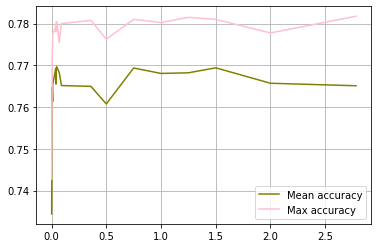

<Figure size 432x288 with 0 Axes>

In [23]:
Cs = [0.000774263683, 0.0059948425, 0.01, 0.01, 0.035, 0.0375, 0.04, 0.04, 0.0425, 0.045, 0.0464158883, 0.07, 0.09, 0.359381366, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.7825594]
mean_acc_c = [0.7344, 0.76475, 0.7613, 0.76535, 0.7688, 0.76915, 0.7655, 0.766, 0.76945, 0.7695, 0.76965, 0.76825, 0.76515, 0.76495, 0.76075, 0.76935, 0.76805, 0.7682, 0.7694, 0.7657, 0.7651]
max_acc_c = [0.74275, 0.77175, 0.77675, 0.7775, 0.779, 0.77975, 0.778, 0.779, 0.7805, 0.7805, 0.7805, 0.7755, 0.78, 0.78075, 0.77625, 0.781, 0.78025, 0.7815, 0.781, 0.77775, 0.78175]
df = pd.DataFrame(list(zip(Cs, mean_acc_c, max_acc_c)), columns=["C values", "Mean accuracy", "Max accuracy"])

plt.plot('C values', 'Mean accuracy', data=df, marker='', color="olive")
plt.plot('C values', 'Max accuracy', data=df, marker='', color="pink")

plt.legend()
plt.grid()

plt.show()
plt.savefig("C-vals_complete.png")

### C values on final iteration

C value was finally picked as 0.0425

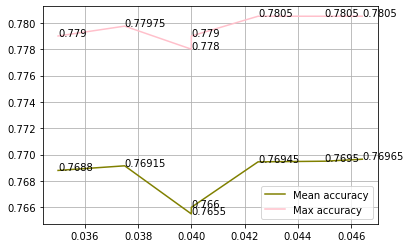

<Figure size 432x288 with 0 Axes>

In [24]:
Cs = [ 0.035, 0.0375, 0.04, 0.04, 0.0425, 0.045, 0.0464158883]
mean_acc_c = [ 0.7688, 0.76915, 0.7655, 0.766, 0.76945, 0.7695, 0.76965]
max_acc_c = [ 0.779, 0.77975, 0.778, 0.779, 0.7805, 0.7805, 0.7805]
df = pd.DataFrame(list(zip(Cs, mean_acc_c, max_acc_c)), columns=["C values", "Mean accuracy", "Max accuracy"])

plt.plot('C values', 'Mean accuracy', data=df, marker='', color="olive")
plt.plot('C values', 'Max accuracy', data=df, marker='', color="pink")

plt.legend()
plt.grid()

for i,j in zip(Cs,mean_acc_c):
    plt.annotate(str(j),xy=(i,j))

for i,j in zip(Cs,max_acc_c):
    plt.annotate(str(j),xy=(i,j))

plt.show()
plt.savefig("C-vals_final.png")

### max_feature hyperparameter tuning

Through this data we picked 300000 as our max number of features

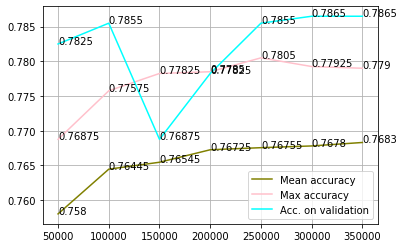

<Figure size 432x288 with 0 Axes>

In [25]:
max = [50000, 100000, 150000, 200000, 250000, 300000, 350000]
mean_acc_c = [0.758, 0.76445, 0.76545, 0.76725, 0.76755, 0.7678, 0.7683]
max_acc_c = [0.76875, 0.77575, 0.77825, 0.7785, 0.7805, 0.77925, 0.779]
validation = [0.7825, 0.7855, 0.76875, 0.77825, 0.7855, 0.7865, 0.7865]

df = pd.DataFrame(list(zip(max, mean_acc_c, max_acc_c, validation)), columns=["C values", "Mean accuracy", "Max accuracy", "Acc. on validation"])

plt.plot('C values', 'Mean accuracy', data=df, marker='', color="olive")
plt.plot('C values', 'Max accuracy', data=df, marker='', color="pink")
plt.plot('C values', 'Acc. on validation', data=df, marker='', color="cyan")

plt.legend()
plt.grid()

for i,j in zip(max,mean_acc_c):
    plt.annotate(str(j),xy=(i,j))

for i,j in zip(max,max_acc_c):
    plt.annotate(str(j),xy=(i,j))

for i,j in zip(max,validation):
    plt.annotate(str(j),xy=(i,j))

plt.show()
plt.savefig("max-feature-vals-complete.png")